## 3.1 Prepare data for modeling by implementing relevant transformations.

In [ ]:
# Load data

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(data_home='/home/nero/Documents/Estudos/DataCamp/Data_Science_Professional_certification_study/Exam_DS101/datasets/', as_frame=True)
housing = pd.concat([housing.data, housing.target*100000], axis=1)
display(housing.head())

# Create categorical data based on price
housing['cat_house_price'] = pd.cut(housing['MedHouseVal'], bins=3, labels=['low','med','high'])
display(housing.groupby('cat_house_price').count())

# Create categorical data from external sources
# using lat and long to get a country

from geopy.geocoders import Nominatim

#smaller dataframe due to execution time
small_housing = housing.iloc[:10,:]

# Function to get contry fom lat and long data
# Define a function to reverse geocode a row and get the country name
geocoder = Nominatim(user_agent="my-study_test")
def get_country_name(row):
    location = geocoder.reverse((row['Latitude'], row['Longitude']), exactly_one=True)
    return location.raw.get('address', {}).get('country', None)

locator = Nominatim(user_agent='Study example for certification')
small_housing['country'] = small_housing.apply(get_country_name, axis=1)

small_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
cat_house_price,,,,,,,,,
low,10089,10089,10089,10089,10089,10089,10089,10089,10089
med,7623,7623,7623,7623,7623,7623,7623,7623,7623
high,2928,2928,2928,2928,2928,2928,2928,2928,2928


/tmp/ipykernel_792902/1642523291.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_housing['country'] = small_housing.apply(get_country_name, axis=1)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cat_house_price,country
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0,high,United States
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0,high,United States
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0,high,United States
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0,high,United States
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0,high,United States


- *Explain the importance of splitting data and split data for training, testing, and validation using Python*


   - Training set: This is the data that is used to train the model. The model learns to associate features with labels on this data.
   
   - Validation set: This set of data is used to evaluate the performance of the model during training. The model is not updated on this data, but it is used to assess whether the model is overfitting to the training data.
   
   - Test set: This set of data is used to evaluate the final performance of the model. The model is not updated on this data, and it is used to get an unbiased estimate of the model's performance on unseen data.


- Explain the importance of scaling data and implement scaling methods using Python.

- Normalization: This method scales the data so that the features have a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import Normalizer

X = housing.iloc[: , :8]

transformer = Normalizer().fit(X)
normalized_data = transformer.transform(X)
normalized_data

array([[ 0.0238481 ,  0.1174473 ,  0.02000651, ...,  0.00732056,
         0.10850985, -0.3501362 ],
       [ 0.00345241,  0.00873354,  0.00259434, ...,  0.00087745,
         0.01574533, -0.05082923],
       [ 0.01409202,  0.10097076,  0.01609345, ...,  0.00544128,
         0.07349506, -0.23735895],
       ...,
       [ 0.00167455,  0.01674553,  0.00512762, ...,  0.00229082,
         0.03883978, -0.11940547],
       [ 0.00248251,  0.02393168,  0.00708579, ...,  0.00282289,
         0.05242368, -0.16129955],
       [ 0.00171478,  0.0114864 ,  0.00377236, ...,  0.00187873,
         0.02826371, -0.08703817]])

- Standardization: This method scales the data so that the features have a mean of 0 and a variance of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X)

standardized_data = transformer.transform(X)
standardized_data

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

- Transform categorical data for modeling using Python

In [ ]:
from sklearn.preprocessing import LabelEncoder

y = housing['cat_house_price'].astype('O').values

le = LabelEncoder()

le.fit(y)

encoded_data = le.transform(y)
display(encoded_data)
display(le.classes_)
display(le.inverse_transform(encoded_data))

array([0, 0, 0, ..., 1, 1, 1])

array(['high', 'low', 'med'], dtype=object)

array(['high', 'high', 'high', ..., 'low', 'low', 'low'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onh = OneHotEncoder()
onh.fit(y.reshape(-1, 1))

onh_data = onh.transform(y.reshape(-1, 1))
display(onh_data.toarray())
display(onh.categories_)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

[array(['high', 'low', 'med'], dtype=object)]

## 3.2 Implement standard modeling approaches for supervised learning problems.

-  Identify regression problems and implement models using Python

In [ ]:
# Regression, predicting house prices

X = housing.iloc[: , :8]
y = housing['MedHouseVal']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# load model for regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, preds)

r2 = r2_score(y_test, preds)

print(f'R2 score: {r2}')

print(f'mse: {mse}  --  rmse: {np.sqrt(mse)}')

R2 score: 0.5970494128783954
mse: 5369686543.3724575  --  rmse: 73278.14505957733


- Identify classification problems and implement models using Python.

0.9729888432178508

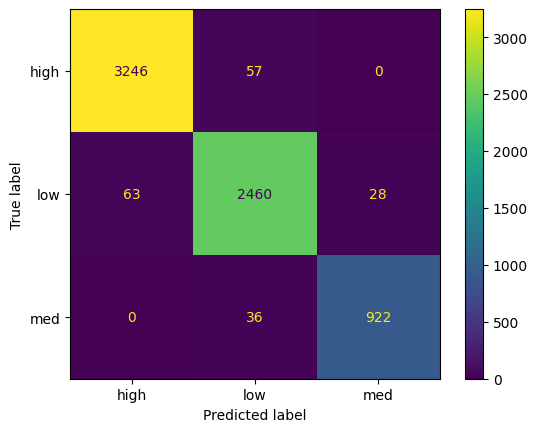

In [ ]:
# Classification of price range from housing data using one hot encodind with pandas
one_hot = pd.get_dummies(data=housing['cat_house_price'], dtype=int)

housing_OneHot = pd.concat([housing, one_hot], axis=1)

X = housing_OneHot[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal', 'low', 'med',
       'high']]
y = housing_OneHot['cat_house_price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


# load and train model

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

preds = clf.predict(X_test)

display(clf.score(X_test, y_test))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, preds, labels=['low','med','high']), display_labels=clf.classes_).plot()

import matplotlib.pyplot as plt

plt.show()


## 3.3 Implement approaches for unsupervised learning problems.

- Identify clustering problems and implement approaches for them using Python.

In [ ]:
# modify y to compare score

from sklearn.preprocessing import LabelEncoder

l_enc = LabelEncoder()
l_enc.fit(y)

lenc_y = l_enc.transform(y).reshape(-1,1)


# Clustering housing data by price

from sklearn.cluster import KMeans

preds = KMeans(n_clusters=3, random_state=42, n_init='auto').fit_predict(X)

from sklearn.metrics import accuracy_score

accuracy_score(lenc_y, preds)

0.4972868217054264

- Explain dimensionality reduction techniques and implement the techniques using Python.

-  Principal component analysis (PCA) is a technique that can be used to reduce the number of features in a dataset while preserving the most important information. PCA works by finding the principal components of the dataset, which are the directions in which the data varies the most. The principal components are then used to create a new dataset with a lower number of features.

In [ ]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components = 3)
pca_model.fit(X)

pca_X = pca_model.transform(X)

display(X.shape, pca_X.shape)

(20640, 12)

(20640, 3)

- Independent component analysis (ICA) is another technique that can be used to reduce the dimensionality of a dataset. ICA works by finding the independent components of the dataset, which are the directions in which the data varies independently of each other. The independent components are then used to create a new dataset with a lower number of features.

In [ ]:
from sklearn.decomposition import FastICA

fast_model = FastICA(n_components=3, whiten='unit-variance')

fast_X = fast_model.fit_transform(X)

display(X.shape, fast_X.shape)

(20640, 12)

(20640, 3)

- Kernel PCA (KPCA) is a variation of PCA that can be used to deal with non-linear data. KPCA works by first transforming the data to a higher-dimensional space using a kernel function, and then applying PCA to the transformed data.

In [ ]:
from sklearn.decomposition import KernelPCA

kern_model = KernelPCA(n_components=3, kernel='linear')

kern_model.fit(X)

kern_X = kern_model.transform(X)

display(X.shape, kern_X.shape)

(20640, 12)

(20640, 3)

- Non-negative matrix factorization (NMF) is a dimensionality reduction technique that decomposes a matrix into two non-negative matrices. The W matrix represents the features of the data, and the H matrix represents the weights of the features.

In [ ]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components = 3, max_iter=1000)
nmf_model.fit(abs(X))

nmf_X = nmf_model.transform(abs(X))

display(X.shape, nmf_X.shape)

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


(20640, 12)

(20640, 3)

## 3.4 Use suitable methods to assess the performance of a model.

- Select metrics to evaluate regression models and calculate the metrics using Python.

In [ ]:
# mse

# Predicted values
y_pred = np.array([1, 2, 3, 4, 5])

# Actual values
y_true = np.array([2, 3, 3, 4, 5])

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)

# Print MSE
print(mse)


0.4


In [ ]:
# rmse

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Print RMSE
print(rmse)

0.6324555320336759


In [ ]:
# mae

from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)

# Print MAE
print(mae)

0.4


In [ ]:
# R2

from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_true, y_pred)

# Print R-squared
print(r2)

0.6153846153846154


- Select metrics to evaluate classification models and calculate the metrics using Python.

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score


# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print accuracy
print(accuracy)

0.6


In [ ]:
# precision
from sklearn.metrics import precision_score

# Predicted values
y_pred = np.array([1, 0, 1, 1, 0])

# Actual values
y_true = np.array([1, 0, 1, 1, 0])

# Calculate precision
precision = precision_score(y_true, y_pred)

# Print precision
print(precision)

1.0


In [ ]:
# recall

from sklearn.metrics import recall_score

# Calculate recall
recall = recall_score(y_true, y_pred)

# Print recall
print(recall)

1.0


In [ ]:
# F1 score
from sklearn.metrics import f1_score

# Calculate f1 score
f1 = f1_score(y_true, y_pred)

# Print f1 score
print(f1)

1.0


-Select metrics and visualizations to evaluate clustering models and implement them using Python.

* Homogeneity measures how similar the data points are within a cluster. A high homogeneity score indicates that the data points in a cluster are very similar to each other.

In [ ]:
from sklearn.metrics import homogeneity_score

# Predicted cluster labels
labels = np.array([0, 0, 1, 1, 1])

# Actual cluster labels
true_labels = np.array([0, 0, 1, 1, 1])

# Calculate homogeneity score
homogeneity = homogeneity_score(true_labels, labels)

# Print homogeneity score
print(homogeneity)


1.0


* Completeness measures how well the data points within a cluster are represented by the cluster centroid. A high completeness score indicates that the data points in a cluster are all very close to the cluster centroid.

In [ ]:
from sklearn.metrics import completeness_score

# Predicted cluster labels
labels = np.array([0, 0, 1, 1, 1])

# Actual cluster labels
true_labels = np.array([0, 0, 1, 1, 1])

# Calculate completeness score
completeness = completeness_score(true_labels, labels)

# Print completeness score
print(completeness)

1.0


* Silhouette coefficient is a measure of how well each data point is assigned to its cluster. A high silhouette coefficient indicates that the data point is well-assigned to its cluster.

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)


import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.551191604619592

* Calinski-Harabasz index is a measure of the separation between clusters. A high Calinski-Harabasz index indicates that the clusters are well-separated.

In [ ]:
metrics.calinski_harabasz_score(X, y)

10633.868943793219

* Davies-Bouldin index is a measure of the compactness and separation of clusters. A low Davies-Bouldin index indicates that the clusters are well-compact and well-separated.

In [ ]:
metrics.davies_bouldin_score(X, y)

0.3645102673195062

* Inter-cluster distance is the average distance between data points in different clusters. A high inter-cluster distance indicates that the clusters are well-separated.

# Visualizations

* Dendrogram is a tree-like diagram that shows the hierarchical relationships between clusters. A dendrogram can be used to visualize the clustering process and to identify the number of clusters.

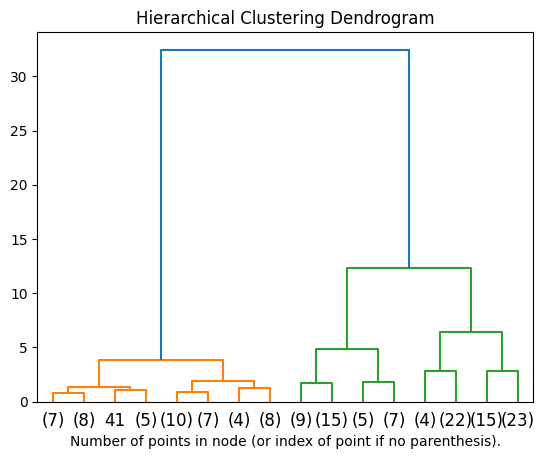

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

* Cluster plot is a scatter plot where the data points are colored according to their cluster labels. A cluster plot can be used to visualize the clusters and to identify the characteristics of each cluster.

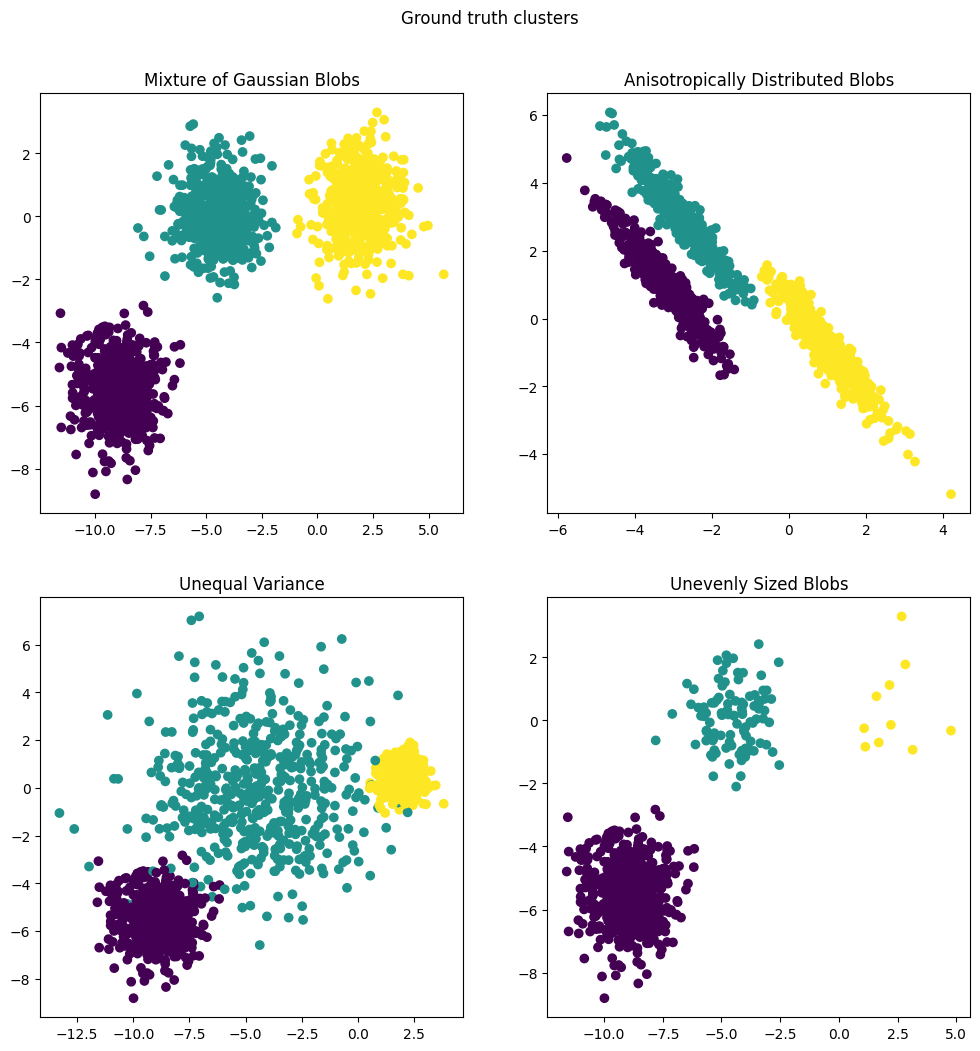

In [ ]:
# sample from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py

import numpy as np

from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Unequal variance
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10


import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Mixture of Gaussian Blobs")

axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 0].set_title("Unequal Variance")

axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

* Cluster silhouette plot is a scatter plot where the data points are colored according to their cluster labels and their silhouette coefficients. A cluster silhouette plot can be used to visualize the clusters and to identify the outliers.

# digits: 10; # samples: 1797; # features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	1.036s	69662	0.680	0.719	0.699	0.570	0.695	0.178
random   	0.536s	69707	0.675	0.716	0.694	0.560	0.691	0.176
PCA-based	0.208s	72686	0.636	0.658	0.647	0.521	0.643	0.145
__________________________________________________________________________________


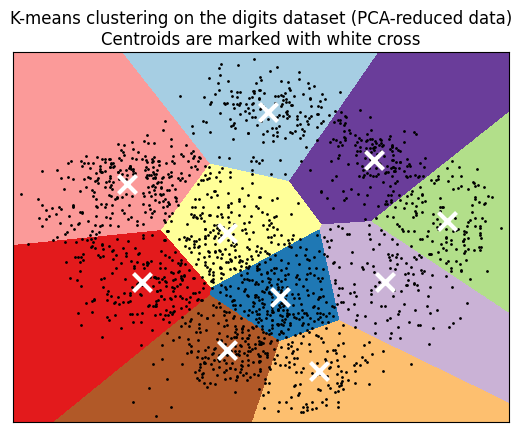

In [ ]:
# code from documentation (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py)

import numpy as np

from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")


import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


* Cluster heatmap is a heatmap that shows the density of data points in the cluster space. A cluster heatmap can be used to visualize the clusters and to identify the areas where the clusters are most dense.